# Homework 3

#### Arish Balasubramaniam CIN : 304455611
#### Ishankumar Patel            CIN : 305096160
#### Cheryl Maria Jose          CIN : 305052753

In [312]:
# Importing all the needed libraries and packages:

import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
from PIL import Image
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl

In [313]:
from sklearn import preprocessing

### a) Download the	dataset	“Face” from	CSNS. Check	out	the	dataset.

In [314]:
 %matplotlib inline

In [315]:
#load an image
img = mpimg.imread("/Users/cherylmariajose/Downloads/HW3/Face/0.jpg")
img

array([[186, 183, 179, ...,  25,  63,  71],
       [183, 183, 181, ...,  31,  34,  68],
       [179, 184, 185, ...,  48,   9,  59],
       ..., 
       [ 32,  27,  23, ...,   3,   3,   4],
       [ 26,  28,  24, ...,   5,   2,   4],
       [ 18,  29,  33, ...,   9,   3,   5]], dtype=uint8)

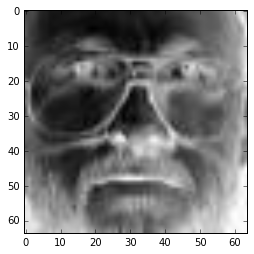

In [316]:
#show an image
plt.imshow(img, cmap ='gray_r')

In [317]:
img100 = mpimg.imread("/Users/cherylmariajose/Downloads/HW3/Face/100.jpg")
img100

array([[182, 199, 214, ..., 145, 144, 145],
       [173, 191, 209, ..., 144, 141, 141],
       [162, 182, 203, ..., 143, 138, 137],
       ..., 
       [ 48, 147, 143, ...,  13,  33,  39],
       [ 75, 157, 144, ...,  16,  36,  38],
       [ 96, 157, 147, ...,  18,  37,  37]], dtype=uint8)

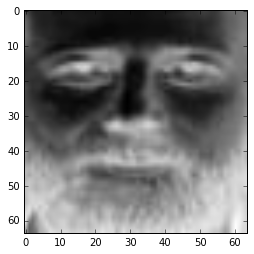

In [318]:
plt.imshow(img100, cmap ='gray_r')

In [319]:
img250 = mpimg.imread("/Users/cherylmariajose/Downloads/HW3/Face/250.jpg")
img250

array([[176, 165, 175, ..., 160, 167, 159],
       [173, 165, 178, ..., 163, 171, 165],
       [179, 168, 179, ..., 165, 176, 174],
       ..., 
       [ 22,  22,  18, ...,  11,  15,  21],
       [ 10,  31,  30, ...,   7,  18,  17],
       [ 31,  11,  98, ...,  30,   9,   7]], dtype=uint8)

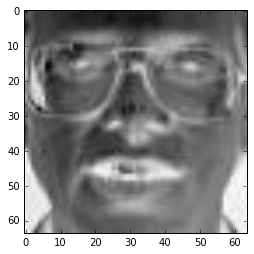

In [320]:
plt.imshow(img250, cmap ='gray_r')

#### b) Build the	feature	matrix and label vector:

In [350]:
%matplotlib inline

n_features = 4096   # 8x8 image

# Feature Table:
X = pd.DataFrame(columns = ['F'+str(j) for j in range(n_features)])

for i in range(400):
    file_name = str(i) + '.jpg'
    file_path = '/Users/cherylmariajose/Downloads/HW3/Face/'
    img = mpimg.imread(file_path + file_name)
    #print(img,'\n')
    #imgplot = plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.show()
    
    img_vector = img.reshape((1,n_features))
    #print(img_vector[0],'\n')
    
    X.loc[i,:] = img_vector[0]

print(X.head())

#Label Vector:
y = []

label = pd.read_csv("https://raw.githubusercontent.com/Arishb/CS5661-Datascience/master/label.csv")
y = label['Label']
print(y.head())      

      F0     F1     F2     F3     F4     F5     F6     F7     F8     F9  \
0  186.0  183.0  179.0  190.0  212.0  219.0  221.0  232.0  230.0  231.0   
1  204.0  198.0  194.0  195.0  198.0  195.0  190.0  186.0  190.0  193.0   
2   86.0   79.0   82.0   95.0  100.0  102.0  121.0  146.0  169.0  179.0   
3   61.0   90.0   98.0  119.0  144.0  156.0  174.0  177.0  183.0  195.0   
4   99.0  134.0  165.0  183.0  201.0  210.0  215.0  224.0  232.0  236.0   

   ...    F4086  F4087  F4088  F4089  F4090  F4091  F4092  F4093  F4094  F4095  
0  ...     56.0   45.0   47.0   18.0    0.0    8.0   15.0    9.0    3.0    5.0  
1  ...     19.0    0.0   29.0   52.0   90.0  146.0  130.0  120.0  164.0  167.0  
2  ...    160.0  167.0  179.0  169.0  192.0  188.0  197.0  189.0  185.0  141.0  
3  ...    119.0  244.0  246.0  168.0  126.0  187.0  162.0  145.0   58.0   18.0  
4  ...     83.0   90.0   94.0   90.0   70.0   41.0   71.0  103.0   92.0  117.0  

[5 rows x 4096 columns]
0    13
1    30
2    34
3    19
4    2

In [351]:
X


,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F4086,F4087,F4088,F4089,F4090,F4091,F4092,F4093,F4094,F4095
0,186.0,183.0,179.0,190.0,212.0,219.0,221.0,232.0,230.0,231.0,...,56.0,45.0,47.0,18.0,0.0,8.0,15.0,9.0,3.0,5.0
1,204.0,198.0,194.0,195.0,198.0,195.0,190.0,186.0,190.0,193.0,...,19.0,0.0,29.0,52.0,90.0,146.0,130.0,120.0,164.0,167.0
2,86.0,79.0,82.0,95.0,100.0,102.0,121.0,146.0,169.0,179.0,...,160.0,167.0,179.0,169.0,192.0,188.0,197.0,189.0,185.0,141.0
3,61.0,90.0,98.0,119.0,144.0,156.0,174.0,177.0,183.0,195.0,...,119.0,244.0,246.0,168.0,126.0,187.0,162.0,145.0,58.0,18.0
4,99.0,134.0,165.0,183.0,201.0,210.0,215.0,224.0,232.0,236.0,...,83.0,90.0,94.0,90.0,70.0,41.0,71.0,103.0,92.0,117.0
5,44.0,58.0,92.0,98.0,176.0,195.0,176.0,198.0,198.0,203.0,...,134.0,138.0,144.0,168.0,58.0,50.0,50.0,57.0,52.0,67.0
6,120.0,168.0,184.0,185.0,184.0,181.0,190.0,186.0,187.0,182.0,...,111.0,162.0,214.0,215.0,113.0,44.0,46.0,53.0,56.0,54.0
7,111.0,126.0,161.0,200.0,220.0,220.0,220.0,225.0,228.0,230.0,...,19.0,18.0,23.0,19.0,20.0,30.0,37.0,40.0,44.0,50.0
8,158.0,162.0,168.0,174.0,180.0,188.0,196.0,201.0,202.0,207.0,...,106.0,113.0,112.0,114.0,111.0,105.0,102.0,98.0,84.0,70.0
9,26.0,46.0,69.0,84.0,96.0,110.0,121.0,126.0,123.0,126.0,...,36.0,53.0,65.0,54.0,47.0,88.0,88.0,82.0,46.0,38.0


In [352]:
y

0      13
1      30
2      34
3      19
4      24
5       6
6      15
7      26
8      14
9      21
10      3
11     13
12     11
13     34
14      1
15      5
16     29
17     14
18     20
19     19
20     17
21     26
22     12
23     34
24     17
25     31
26      7
27      1
28     28
29     10
       ..
370    24
371    11
372    26
373     7
374    33
375     2
376    16
377    33
378    38
379    17
380    38
381     3
382    19
383    31
384     8
385     7
386     8
387    29
388    24
389    27
390    21
391     0
392    35
393    19
394    25
395    32
396    19
397    11
398     4
399    17
Name: Label, dtype: int64

In [353]:
print(X.shape)
print(y.shape)


(400, 4096)
(400,)


#### c) Normalize each column of feature matrix

In [354]:
X_scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)

In [355]:
X_scaled

array([[ 1.37649641,  1.11885303,  0.79610373, ..., -1.17094622,
        -1.24726506, -1.21711982],
       [ 1.68113398,  1.3654141 ,  1.03570156, ...,  0.68710075,
         1.48558299,  1.58234648],
       [-0.31593455, -0.59063704, -0.75329558, ...,  1.84210291,
         1.84204144,  1.13304942],
       ..., 
       [ 0.98723729,  1.02022861,  1.01972837, ..., -0.58507555,
        -0.48342554, -0.38764832],
       [ 0.68259971,  0.52710647,  0.34885444, ...,  0.88797069,
         0.63687242,  0.71831368],
       [-0.231313  , -0.67282406, -1.0088666 , ..., -0.06616154,
        -0.55132239, -0.50861291]])

In [356]:
X_norm = pd.DataFrame(X_scaled)
X_norm

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,1.376496,1.118853,0.796104,0.763445,0.958018,0.942786,0.847410,0.960266,0.840342,0.820069,...,-0.710060,-0.846611,-0.792436,-1.207042,-1.450476,-1.283186,-1.106845,-1.170946,-1.247265,-1.217120
1,1.681134,1.365414,1.035702,0.843617,0.725408,0.521762,0.264739,0.020081,-0.018794,-0.027663,...,-1.423446,-1.628179,-1.105583,-0.636535,0.080459,1.022764,0.756599,0.687101,1.485583,1.582346
2,-0.315935,-0.590637,-0.753296,-0.759837,-0.902856,-1.109705,-1.032173,-0.797471,-0.469840,-0.339985,...,1.295133,1.272305,1.503976,1.326681,1.815519,1.724575,1.842258,1.842103,1.842041,1.133049
3,-0.739042,-0.409826,-0.497725,-0.375008,-0.171799,-0.162401,-0.035994,-0.163868,-0.169142,0.016955,...,0.504624,2.609654,2.669579,1.309901,0.692833,1.707865,1.275123,1.105580,-0.313683,-0.992471
4,-0.095919,0.313420,0.572479,0.651203,0.775253,0.784902,0.734635,0.796756,0.883299,0.931612,...,-0.189481,-0.065044,0.025226,0.001091,-0.259749,-0.731763,-0.199429,0.402535,0.263440,0.718314
5,-1.026756,-0.935823,-0.593564,-0.711733,0.359880,0.521762,0.001598,0.265347,0.153034,0.195424,...,0.793835,0.768628,0.895079,1.309901,-0.463873,-0.581375,-0.539710,-0.367466,-0.415529,-0.145719
6,0.259492,0.872292,0.875970,0.683272,0.492799,0.276165,0.264739,0.020081,-0.083229,-0.273059,...,0.350379,1.185464,2.112873,2.098543,0.471698,-0.681634,-0.604526,-0.434423,-0.347632,-0.370368
7,0.107173,0.181921,0.508586,0.923790,1.090937,0.960329,0.828615,0.817194,0.797386,0.797760,...,-1.423446,-1.315552,-1.209966,-1.190262,-1.110268,-0.915571,-0.750360,-0.652032,-0.551322,-0.439490
8,0.902616,0.773668,0.620399,0.506892,0.426339,0.398964,0.377514,0.326663,0.238947,0.284659,...,0.253975,0.334424,0.338373,0.403802,0.437677,0.337663,0.302891,0.318839,0.127646,-0.093877
9,-1.331393,-1.133071,-0.960947,-0.936217,-0.969316,-0.969363,-1.032173,-1.206247,-1.457847,-1.522347,...,-1.095674,-0.707666,-0.479289,-0.602976,-0.650988,0.053597,0.076037,0.051013,-0.517374,-0.646858


#### d) Use sklearn functions to split the Normalized dataset into testing and training sets with 
#### the following parameters: test_size=0.25, random_state=5.

In [357]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25,random_state=5)

In [358]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(300, 4096)
(300,)


In [359]:
# print the size of the traning set:
print(X_test.shape)
print(y_test.shape)

(100, 4096)
(100,)


#### e) Use PCA to reduce the dimensionality from 4096 to 50

In [360]:
from sklearn.decomposition import PCA

In [361]:
pca = PCA(n_components=50)

In [362]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [363]:
res = pca.fit_transform(X_train)
res

array([[-47.80994275,  -6.7404013 ,  -7.05903156, ...,  -1.0058159 ,
         -0.50183762,   1.23087541],
       [-23.30556153,  -8.8855341 ,  -8.40188695, ...,   2.06754165,
         -0.8736182 ,  -5.44865985],
       [ 26.31421938,   4.81951488,   6.81237897, ...,   0.73699398,
         -1.87581759,  -2.83407401],
       ..., 
       [ 18.1094519 ,   9.93641894,  -3.08744444, ...,  -5.23416728,
          0.61861559,   4.4684709 ],
       [ -3.3456383 , -66.55696665,  26.87337754, ...,  -3.14598792,
          3.16818673,   1.66526389],
       [  2.26525266,  16.58895684,   5.74178162, ...,  -5.87524567,
         -1.45745033,   2.64165006]])

In [364]:
X_train_new = pd.DataFrame(res)
X_train_new

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-47.809943,-6.740401,-7.059032,-13.358404,3.596550,5.422515,2.024200,-3.179323,0.162236,9.078796,...,-2.099031,2.139361,-2.209256,0.123152,1.417026,1.060822,-0.208577,-1.005816,-0.501838,1.230875
1,-23.305562,-8.885534,-8.401887,6.476880,-16.263500,7.027841,13.273870,-7.268939,-11.486049,-9.205200,...,-4.226111,-1.751154,2.433899,1.836058,-2.452040,2.217745,2.148292,2.067542,-0.873618,-5.448660
2,26.314219,4.819515,6.812379,-5.477064,-0.820433,18.277652,-14.548302,15.270028,9.247700,-15.626585,...,-3.276616,-2.256784,-0.773384,0.521020,-2.725768,1.314203,4.961958,0.736994,-1.875818,-2.834074
3,8.266427,4.638028,3.078472,25.603085,1.841106,-14.817226,6.585406,-14.831171,16.129472,-18.394249,...,5.352870,0.491215,5.113389,1.731934,-2.313559,1.888278,6.132162,1.317236,-0.836043,2.185375
4,-45.410689,-7.332661,-17.590844,-0.655903,0.724134,-9.391711,-4.122990,-15.028000,11.394468,6.770517,...,-1.148997,2.983295,-1.241896,-1.149753,1.995542,3.084364,0.609642,1.760468,1.718218,-1.063587
5,-28.699866,2.889641,9.610243,10.291233,-9.157214,2.500756,-1.054540,1.417412,18.323664,15.121424,...,-6.228107,3.178626,-3.700107,-4.830729,-3.082491,-0.982004,-4.264529,5.728887,1.875461,8.272308
6,2.175181,-10.581492,46.600990,4.259045,-10.675600,-1.335303,7.844187,-3.193526,19.283271,6.397166,...,-2.223366,4.471943,-1.568139,-2.034966,-2.362015,2.676543,4.830913,-1.596074,2.151831,1.269326
7,-11.131417,-9.144832,4.238609,5.868718,-0.444435,6.832525,-15.741848,-2.005577,-0.548256,2.318978,...,8.532105,5.078198,1.815861,-0.988425,1.730988,6.131406,-0.169472,4.348101,3.173285,-1.874914
8,-11.073040,-0.506585,-2.459179,0.555383,3.281032,1.937285,-17.265431,0.445104,3.031254,9.961013,...,-6.717628,-1.433360,0.612698,2.798179,1.050617,3.337570,0.120428,2.595890,1.877271,4.588400
9,42.663400,-23.737365,-0.650143,-25.600512,15.946845,-18.567596,15.454190,-1.777615,-5.872061,7.737984,...,1.824921,-3.502360,0.434584,-1.379600,-0.803954,-3.851737,-0.260198,1.423879,3.244767,0.242737


In [365]:
X_train_new.shape

(300, 50)

In [366]:
res2 = pca.transform(X_test)
res2

array([[  4.22342226, -59.4300467 ,   3.25001018, ...,   1.09393914,
         -0.58305086,  -2.10450707],
       [ 51.07898078, -30.85976709,  -4.91737362, ...,   1.53597784,
          3.9930272 ,   0.1245323 ],
       [-46.294452  , -23.56668041,  -1.33962774, ...,   6.00566333,
          5.09174461,   3.0923625 ],
       ..., 
       [ -2.93723212,   5.47407892,  -9.18986253, ...,  -1.2970851 ,
         -0.15210016,  -1.39938884],
       [ 32.96965565, -10.31307297,   0.17730994, ...,  -6.03349883,
         -0.41764887,   2.63945233],
       [-27.08087399, -36.91346223,  -6.86513662, ...,   1.47290776,
         -1.64156712,  -1.80153477]])

In [367]:
X_test_new = pd.DataFrame(res2)
X_test_new 

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,4.223422,-59.430047,3.250010,10.228930,-4.364694,-2.121274,6.548913,-5.269204,-9.234166,2.121469,...,-4.071270,0.508970,2.458756,0.749132,-5.568052,-3.160146,1.694256,1.093939,-0.583051,-2.104507
1,51.078981,-30.859767,-4.917374,-21.213531,15.904366,-11.228932,9.522024,-1.307012,0.269500,2.492720,...,-2.190026,-3.035589,2.220124,1.462622,1.063796,-2.793198,0.517813,1.535978,3.993027,0.124532
2,-46.294452,-23.566680,-1.339628,-0.625463,13.818931,-17.979495,-2.888866,4.903201,8.335074,-3.224647,...,3.932646,-2.354702,1.487237,-2.959598,-0.301957,2.141074,-0.660582,6.005663,5.091745,3.092363
3,-31.162143,-17.600575,-11.222512,5.842149,-15.126557,-0.229532,2.785045,2.302332,-15.255147,3.621407,...,-3.884317,-2.948712,0.529021,2.625006,0.999722,1.272974,0.799748,-1.134787,2.145685,-1.070392
4,-2.094782,20.679116,-13.582743,-25.525720,-6.117823,-3.478034,-9.557158,4.745852,11.651558,0.617511,...,-1.816038,4.427010,1.576053,2.158271,-1.989695,1.451477,-3.001669,0.946250,-2.083674,-0.420043
5,-0.860644,-29.938478,0.347473,-5.003726,6.806048,12.380869,23.078801,0.734487,-5.625648,-7.109431,...,3.986438,-3.672007,-0.211448,1.379991,1.547546,-3.058992,0.195020,-0.423544,0.180967,1.043432
6,81.985620,-6.860191,-8.205420,2.028927,6.881479,10.945415,1.812040,1.848353,8.669609,6.450295,...,3.536081,1.776279,3.409583,-0.813520,-0.730168,-3.305077,1.289815,-3.827465,-1.366691,1.505261
7,7.955443,5.151460,0.364291,1.693139,-13.358199,2.532865,-6.723104,-5.644900,-9.695732,-8.816721,...,0.094988,-5.734407,-1.062926,3.156415,-1.638176,-0.175301,-3.337315,-3.774226,-3.336864,2.785055
8,-5.168690,-78.160544,26.689372,-11.466833,-8.903657,4.561755,10.629522,-6.153382,0.804633,-2.604842,...,3.882639,-0.375223,4.033365,1.307490,-2.350928,-0.026581,-0.723771,2.372468,-3.461623,0.756680
9,-10.673123,-15.802953,-2.165948,-6.149364,24.211036,20.633378,6.374816,-1.848517,-8.987094,-3.720790,...,0.014541,0.351626,-2.673114,-2.282823,0.394053,-3.106187,1.211598,3.690884,3.606630,-0.789898


In [368]:
X_test_new.shape

(100, 50)

In [369]:
from sklearn.svm import SVC

#### f) Design and Train a non-linear SVM classifier to recognize the face based on the training dataset.
#### Use  SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

In [370]:
my_SVM = SVC(C=1,kernel='rbf',gamma=0.0005,random_state=1)
my_SVM.fit (X_train_new, y_train)
y_predict_svm = my_SVM.predict (X_test_new)

In [371]:
score_ann = accuracy_score(y_predict, y_test)
print(score_ann)

0.91


#### Accuracy is 91%

#### Also, calculate and report the Confusion Matrix.

In [372]:
from sklearn import metrics

CM_SVM = metrics.confusion_matrix(y_test, y_predict_svm)

print("Confusion matrix:")
print(CM_SVM)

Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


In [379]:
# show the missclassified samples:
# list of the indexes of the samples selected as testing
test_index_list = list(y_test.index)

print (test_index_list)

y_test_list = y_test.values

print (y_test_list)

[218, 191, 117, 50, 348, 282, 195, 327, 123, 363, 308, 161, 52, 185, 176, 139, 230, 333, 88, 351, 331, 372, 393, 357, 392, 43, 115, 300, 279, 66, 252, 150, 201, 62, 244, 75, 380, 337, 326, 49, 302, 47, 253, 257, 90, 242, 71, 141, 313, 307, 21, 53, 155, 170, 122, 99, 222, 329, 283, 311, 317, 306, 0, 60, 330, 292, 101, 132, 370, 299, 298, 259, 55, 397, 318, 184, 140, 107, 241, 48, 249, 42, 297, 127, 56, 272, 149, 319, 263, 12, 335, 262, 237, 353, 76, 368, 89, 182, 219, 18]
[16 32  4 24 29 38 21 12 23 28  9 13 29 21 10  1 36 11 39 16  8 26 19 12 35
  0 21 20  8 14  7 33 23  0 20  1 38 25  8 23  9 25 10 13 38 25 26 18  4 36
 26 17 13 16 23 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31 31 11 14
 22 16 34 11 15 15  0  2 25  5 34 11 18 22 11  5  1 16 24 36 33 32 13 38 20]


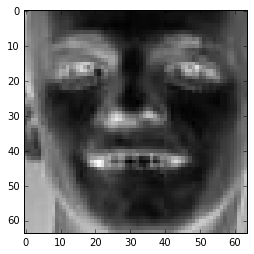

117.jpg
Prediction:  39
Actual:  4 



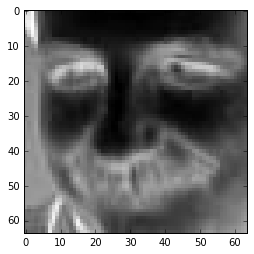

50.jpg
Prediction:  22
Actual:  24 



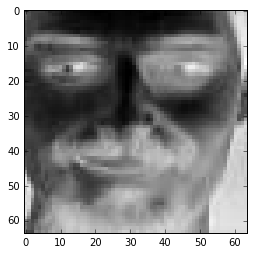

351.jpg
Prediction:  25
Actual:  16 



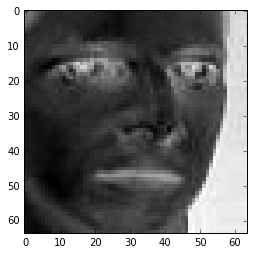

43.jpg
Prediction:  7
Actual:  0 



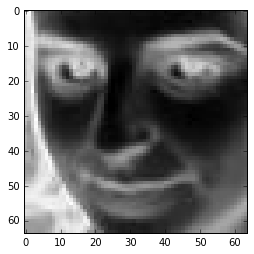

302.jpg
Prediction:  39
Actual:  9 



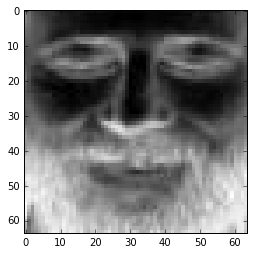

47.jpg
Prediction:  2
Actual:  25 



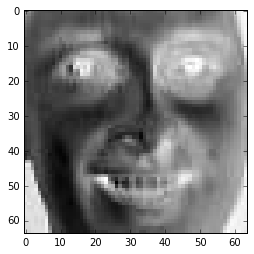

122.jpg
Prediction:  38
Actual:  23 



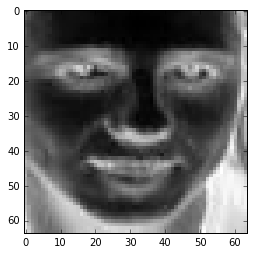

397.jpg
Prediction:  37
Actual:  11 



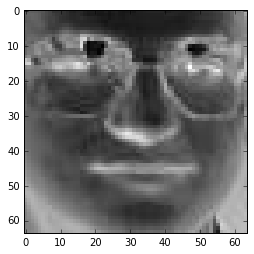

335.jpg
Prediction:  12
Actual:  5 



In [380]:
for i in range(len(test_index_list)):
    if (y_predict[i] != y_test_list[i]):
        file_name = str(test_index_list[i]) + '.jpg'
        file_path = '/Users/cherylmariajose/Downloads/HW3/Face/'
        img = mpimg.imread(file_path + file_name)
        imgplot = plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
        plt.show()
        
        print(file_name)
        print('Prediction: ',y_predict[i])
        print('Actual: ',y_test_list[i],'\n')

#### g) Now use GridSearchCV to find the best value	 for parameter C. Search in thislist: [0.1,1,10,100,1e3,5e3,1e4,5e4,1e5].

In [373]:
frames = [X_train_new, X_test_new]

In [374]:
con_X_result = pd.concat(frames)
con_X_result

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-47.809943,-6.740401,-7.059032,-13.358404,3.596550,5.422515,2.024200,-3.179323,0.162236,9.078796,...,-2.099031,2.139361,-2.209256,0.123152,1.417026,1.060822,-0.208577,-1.005816,-0.501838,1.230875
1,-23.305562,-8.885534,-8.401887,6.476880,-16.263500,7.027841,13.273870,-7.268939,-11.486049,-9.205200,...,-4.226111,-1.751154,2.433899,1.836058,-2.452040,2.217745,2.148292,2.067542,-0.873618,-5.448660
2,26.314219,4.819515,6.812379,-5.477064,-0.820433,18.277652,-14.548302,15.270028,9.247700,-15.626585,...,-3.276616,-2.256784,-0.773384,0.521020,-2.725768,1.314203,4.961958,0.736994,-1.875818,-2.834074
3,8.266427,4.638028,3.078472,25.603085,1.841106,-14.817226,6.585406,-14.831171,16.129472,-18.394249,...,5.352870,0.491215,5.113389,1.731934,-2.313559,1.888278,6.132162,1.317236,-0.836043,2.185375
4,-45.410689,-7.332661,-17.590844,-0.655903,0.724134,-9.391711,-4.122990,-15.028000,11.394468,6.770517,...,-1.148997,2.983295,-1.241896,-1.149753,1.995542,3.084364,0.609642,1.760468,1.718218,-1.063587
5,-28.699866,2.889641,9.610243,10.291233,-9.157214,2.500756,-1.054540,1.417412,18.323664,15.121424,...,-6.228107,3.178626,-3.700107,-4.830729,-3.082491,-0.982004,-4.264529,5.728887,1.875461,8.272308
6,2.175181,-10.581492,46.600990,4.259045,-10.675600,-1.335303,7.844187,-3.193526,19.283271,6.397166,...,-2.223366,4.471943,-1.568139,-2.034966,-2.362015,2.676543,4.830913,-1.596074,2.151831,1.269326
7,-11.131417,-9.144832,4.238609,5.868718,-0.444435,6.832525,-15.741848,-2.005577,-0.548256,2.318978,...,8.532105,5.078198,1.815861,-0.988425,1.730988,6.131406,-0.169472,4.348101,3.173285,-1.874914
8,-11.073040,-0.506585,-2.459179,0.555383,3.281032,1.937285,-17.265431,0.445104,3.031254,9.961013,...,-6.717628,-1.433360,0.612698,2.798179,1.050617,3.337570,0.120428,2.595890,1.877271,4.588400
9,42.663400,-23.737365,-0.650143,-25.600512,15.946845,-18.567596,15.454190,-1.777615,-5.872061,7.737984,...,1.824921,-3.502360,0.434584,-1.379600,-0.803954,-3.851737,-0.260198,1.423879,3.244767,0.242737


In [375]:
frames2 = [y_train, y_test]

In [376]:
con_y_result = pd.concat(frames1)
con_y_result 

24     17
33     22
396    19
273    18
246    11
108    15
6      15
10      3
347    12
138    32
212    33
81      6
280    26
343    35
98     26
157    12
325    20
224    28
240    39
227    39
269    18
26      7
153    11
321    35
199    22
381     3
334    29
83     10
92      5
45      5
       ..
298     4
259    31
55     31
397    11
318    14
184    22
140    16
107    34
241    11
48     15
249    15
42      0
297     2
127    25
56      5
272    34
149    11
319    18
263    22
12     11
335     5
262     1
237    16
353    24
76     36
368    33
89     32
182    13
219    38
18     20
Name: Label, dtype: int64

In [348]:
con_y_result.shape

(400,)

In [377]:
from sklearn.model_selection import GridSearchCV

parameter_candidates = [{'C': [0.1,1,10,100,1e3,5e3,1e4,5e4,1e5]},]

my_SVM = SVC(C=1,kernel='rbf',gamma=0.0005,random_state=1)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_SVM, parameter_candidates, cv=10, scoring='accuracy', n_jobs=8)

# fit the grid (start the grid search):
grid.fit(con_X_result, con_y_result)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)


0.9625
{'C': 10}
